<a href="https://colab.research.google.com/github/ishaan1234/ANN_Practice/blob/main/Predict_Churning_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Neural Networks Udemy Practice/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop("RowNumber", axis=1, inplace=True)
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<ipython-input-8-a254cc41ac25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(), annot=True)


[]

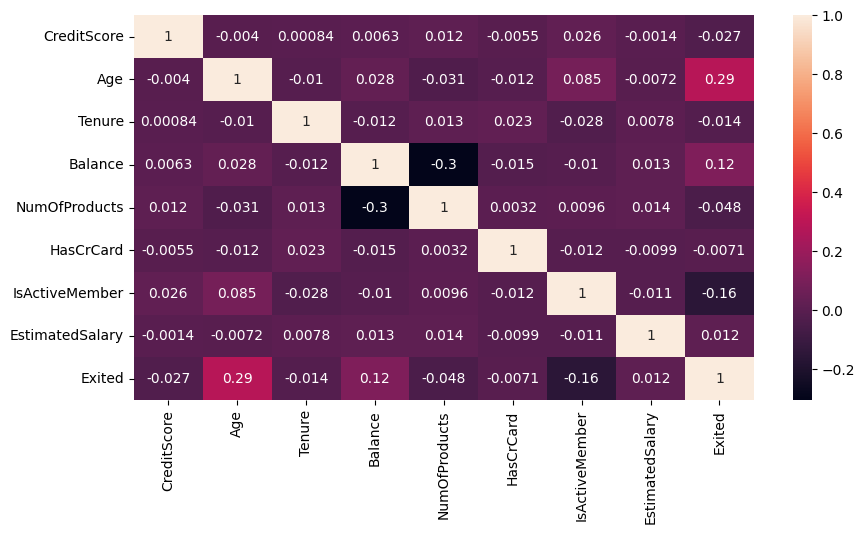

In [8]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(df.corr(), annot=True)
plt.plot()

In [9]:
X=df.drop("Exited", axis=1)
y=df["Exited"]

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Gender']=le.fit_transform(X['Gender'])
X['Geography']=le.fit_transform(X['Geography'])

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling SUPER IMPORTANT FOR NEURAL NETWORKS

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [14]:
X_train

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])


## Build and Train the ANN

In [15]:
import tensorflow as tf

ann = tf.keras.models.Sequential() #Initialize it

ann.add(tf.keras.layers.Dense(units=7, activation='relu')) #Hidden layer 1
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #Hidden layer 2
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #Hidden layer 3
ann.add(tf.keras.layers.Dense(units=5, activation='relu')) #Hidden layer 4
ann.add(tf.keras.layers.Dense(units=5, activation='relu')) #Hidden layer 5


ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Output layer
#Sigmoid: Binary 
#Softmax: Categorical

In [16]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [17]:
#Compile the model
ann.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy']) #Adam does Stochas

In [18]:
ann.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping]) #Yann LeCun said 32

Epoch 1/100
250/250 [==============================] - 4s 4ms/step - loss: 0.6416 - accuracy: 0.7421
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4873 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4455 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4235 - accuracy: 0.8058
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4041 - accuracy: 0.8226
Epoch 6/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3805 - accuracy: 0.8471
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3652 - accuracy: 0.8504
Epoch 8/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3585 - accuracy: 0.8564
Epoch 9/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3552 - accuracy: 0.8562
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3543 - accura

### Evaluation metrics 

In [34]:
y_preds_ann=ann.predict(X_test)

63/63 [==============================] - 0s 4ms/step


In [35]:
y_preds_ann=(y_preds_ann>0.5) #If probability>0.5, customer might leave, and output=1

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
confusion_matrix(y_test, y_preds_ann)

array([[1541,   66],
       [ 219,  174]])

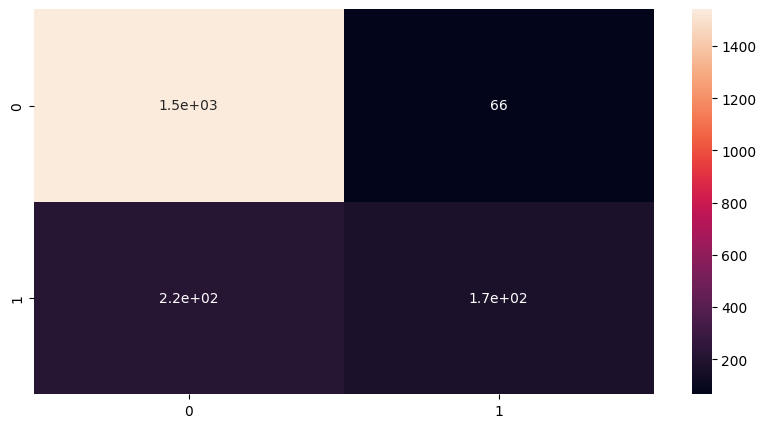

In [38]:
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(confusion_matrix(y_test, y_preds_ann), annot=True)

In [39]:
print(classification_report(y_test, y_preds_ann))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

